In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
solar_consumption=pd.read_csv('Consumo_fotovoltaica.csv')
grid_consumption=pd.read_csv('Consumo.csv')
solar_gen=pd.read_csv('Generacion_fotovoltaica.csv')
weather=pd.read_csv('Meteorologia.csv')

In [3]:
solar_consumption['FECHA']=pd.to_datetime(solar_consumption['FECHA'].apply(lambda x: x[:-6]))
grid_consumption['FECHA']=pd.to_datetime(grid_consumption['FECHA'])
solar_gen['FECHA']=pd.to_datetime(solar_gen['FECHA'])
weather['FORECAST_TIMESTAMP']=pd.to_datetime(weather['FORECAST_TIMESTAMP'].apply(lambda x: x[:-6]))

In [4]:
solar_consumption.head()

,FECHA,TOTAL_KWH_ENERGIA
0,2024-09-01 00:00:00,0.0
1,2024-09-01 01:00:00,0.0
2,2024-09-01 02:00:00,0.0
3,2024-09-01 03:00:00,0.0
4,2024-09-01 04:00:00,0.0


In [5]:
grid_consumption.head()

,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,506.012634
1,2023-07-24 12:00:00,456.551453
2,2023-07-24 13:00:00,395.318604
3,2023-07-24 14:00:00,330.052979
4,2023-07-24 15:00:00,183.146606


In [6]:
solar_gen.head()

,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,NaN
1,2023-07-24 12:00:00,115.66
2,2023-07-24 13:00:00,129.98
3,2023-07-24 14:00:00,134.35
4,2023-07-24 15:00:00,133.90


In [7]:
weather.head()

,FORECAST_TIMESTAMP,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,...,spsurface_0,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80
0,2023-07-24 11:00:00,40.0,-4.0,6.989717,1.524463,19.6,0.005070,301.667859,18000.0,300.244031,...,95095.853125,0.8,298.878662,301.632129,291.701489,324.006396,0.0,316.100012,7.979102,1.763457
1,2023-07-24 12:00:00,40.0,-4.0,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,...,95033.793750,1.7,300.500000,303.363452,291.701489,325.803369,0.0,318.700000,8.801675,1.623066
2,2023-07-24 13:00:00,40.0,-4.0,8.506143,1.294370,18.2,0.005665,304.854614,3600.0,302.703198,...,94955.268750,8.8,301.995581,304.815100,303.400000,326.096606,0.0,319.277295,9.977305,1.662959
3,2023-07-24 14:00:00,40.0,-4.0,9.392205,1.283123,17.4,0.005709,305.681506,7200.0,303.544031,...,94899.959375,5.0,302.944043,305.689685,303.400000,326.790967,0.0,318.515942,11.152161,1.711703
4,2023-07-24 15:00:00,40.0,-4.0,10.167048,1.555879,18.3,0.006080,305.976172,10800.0,303.834607,...,94838.475000,35.8,303.432275,305.995581,303.400000,329.955933,0.0,316.435266,12.256921,2.011133


In [8]:
solar_gen.iloc[0,0]==weather.iloc[0,0]

True

In [9]:
weather.tail()

,FORECAST_TIMESTAMP,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,...,spsurface_0,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80
100552,2024-10-31 19:00:00,40.5,-3.5,-1.515610,0.914978,60.0,0.007987,290.736934,0.0,290.747119,...,94514.231250,56.6,290.670273,290.899238,290.726934,295.502661,0.0,289.097119,-2.300679,2.322466
100553,2024-10-31 20:00:00,40.5,-3.5,-0.758618,1.620525,63.8,0.007911,289.628125,0.0,289.591248,...,94542.484375,65.8,290.036563,290.899238,289.630059,295.607007,0.0,287.037329,-0.981880,2.815010
100554,2024-10-31 21:00:00,40.5,-3.5,-0.599971,1.527935,66.9,0.007852,288.801836,0.0,288.833850,...,94573.962500,35.9,289.335586,290.899238,288.800527,294.524219,0.0,285.914941,-0.491460,2.447852
100555,2024-10-31 22:00:00,40.5,-3.5,-1.420417,1.414846,68.3,0.007774,288.305859,0.0,288.343433,...,94594.331250,30.5,288.730078,290.895859,288.300527,293.401611,0.0,285.514941,-1.662617,2.301050
100556,2024-10-31 23:00:00,40.5,-3.5,-1.703437,1.640642,70.5,0.007682,287.639941,0.0,287.584033,...,94592.437500,86.1,287.939297,290.899941,287.640527,292.220996,0.0,285.129858,-2.118813,3.033606


In [10]:
print(f'{grid_consumption['FECHA'].min()}, {grid_consumption['FECHA'].max()}')

print(f'{solar_gen['FECHA'].min()}, {solar_gen['FECHA'].max()}')

print(f'{weather['FORECAST_TIMESTAMP'].min()}, {weather['FORECAST_TIMESTAMP'].max()}')

2023-07-24 11:00:00, 2024-08-31 23:00:00
2023-07-24 11:00:00, 2024-08-31 23:00:00
2023-07-24 11:00:00, 2024-10-31 23:00:00


In [11]:
px.line(solar_gen,x='FECHA',y='TOTAL_KWH_ENERGIA')

In [12]:
weather[weather['FORECAST_TIMESTAMP']=='2023-07-24 12:00:00']

,FORECAST_TIMESTAMP,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,...,spsurface_0,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80
1,2023-07-24 12:00:00,40.00,-4.00,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,...,95033.79375,1.7,300.5,303.363452,291.701489,325.803369,0.0,318.7,8.801675,1.623066
11174,2023-07-24 12:00:00,40.00,-3.75,7.186357,1.511797,17.3,0.004918,303.265576,21600.0,301.370923,...,94867.39375,0.0,300.4,303.263452,292.501489,323.303369,0.0,318.5,8.081675,1.803066
22347,2023-07-24 12:00:00,40.00,-3.50,6.576357,0.991797,15.1,0.004263,302.865576,21600.0,301.070923,...,93876.99375,0.0,300.0,302.863452,292.801489,320.803369,0.0,318.6,7.421675,1.343066
33520,2023-07-24 12:00:00,40.25,-4.00,6.196357,4.901797,17.8,0.005028,303.065576,21600.0,301.270923,...,94192.19375,6.1,300.2,303.063452,292.001489,327.903369,0.0,318.3,6.991675,4.833066
44693,2023-07-24 12:00:00,40.25,-3.75,6.716357,4.041797,17.5,0.004903,302.865576,21600.0,301.070923,...,94025.79375,3.6,300.0,302.963452,292.501489,325.803369,0.0,318.3,7.701675,4.183066
55866,2023-07-24 12:00:00,40.25,-3.50,6.916357,3.621797,16.2,0.004571,303.065576,21600.0,301.270923,...,94033.79375,0.1,300.3,303.063452,292.501489,323.503369,0.0,318.3,7.961675,3.933066
67039,2023-07-24 12:00:00,40.50,-4.00,3.456357,0.591797,18.1,0.005262,303.165576,21600.0,301.470923,...,92438.59375,15.1,300.5,303.263452,294.001489,329.403369,0.0,312.2,4.221675,0.353066
78212,2023-07-24 12:00:00,40.50,-3.75,2.606357,2.961797,16.4,0.004818,303.465576,21600.0,301.570923,...,93304.19375,5.0,300.9,303.563452,296.901489,328.503369,0.0,312.1,3.851675,3.413066
89385,2023-07-24 12:00:00,40.50,-3.50,3.856357,3.291797,16.1,0.004685,303.565576,21600.0,301.670923,...,93774.59375,2.6,300.9,303.563452,294.701489,326.903369,0.0,321.6,4.841675,3.633066


In [13]:
data=weather.merge(solar_gen,how='left', left_on='FORECAST_TIMESTAMP',right_on='FECHA')
data

,FORECAST_TIMESTAMP,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,...,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,FECHA,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,40.0,-4.0,6.989717,1.524463,19.6,0.005070,301.667859,18000.0,300.244031,...,298.878662,301.632129,291.701489,324.006396,0.0,316.100012,7.979102,1.763457,2023-07-24 11:00:00,NaN
1,2023-07-24 12:00:00,40.0,-4.0,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,...,300.500000,303.363452,291.701489,325.803369,0.0,318.700000,8.801675,1.623066,2023-07-24 12:00:00,115.66
2,2023-07-24 13:00:00,40.0,-4.0,8.506143,1.294370,18.2,0.005665,304.854614,3600.0,302.703198,...,301.995581,304.815100,303.400000,326.096606,0.0,319.277295,9.977305,1.662959,2023-07-24 13:00:00,129.98
3,2023-07-24 14:00:00,40.0,-4.0,9.392205,1.283123,17.4,0.005709,305.681506,7200.0,303.544031,...,302.944043,305.689685,303.400000,326.790967,0.0,318.515942,11.152161,1.711703,2023-07-24 14:00:00,134.35
4,2023-07-24 15:00:00,40.0,-4.0,10.167048,1.555879,18.3,0.006080,305.976172,10800.0,303.834607,...,303.432275,305.995581,303.400000,329.955933,0.0,316.435266,12.256921,2.011133,2023-07-24 15:00:00,133.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100552,2024-10-31 19:00:00,40.5,-3.5,-1.515610,0.914978,60.0,0.007987,290.736934,0.0,290.747119,...,290.670273,290.899238,290.726934,295.502661,0.0,289.097119,-2.300679,2.322466,NaT,NaN
100553,2024-10-31 20:00:00,40.5,-3.5,-0.758618,1.620525,63.8,0.007911,289.628125,0.0,289.591248,...,290.036563,290.899238,289.630059,295.607007,0.0,287.037329,-0.981880,2.815010,NaT,NaN
100554,2024-10-31 21:00:00,40.5,-3.5,-0.599971,1.527935,66.9,0.007852,288.801836,0.0,288.833850,...,289.335586,290.899238,288.800527,294.524219,0.0,285.914941,-0.491460,2.447852,NaT,NaN
100555,2024-10-31 22:00:00,40.5,-3.5,-1.420417,1.414846,68.3,0.007774,288.305859,0.0,288.343433,...,288.730078,290.895859,288.300527,293.401611,0.0,285.514941,-1.662617,2.301050,NaT,NaN


In [14]:
data=data.rename(columns={'FORECAST_TIMESTAMP':'date'})
data.drop('FECHA',axis=1, inplace=True)

In [15]:
data['month']=pd.DatetimeIndex(data['date']).month
data['day']=pd.DatetimeIndex(data['date']).day
data['hour']=pd.DatetimeIndex(data['date']).hour

In [16]:
data.set_index('date',inplace=True)

In [17]:
lats=[40,40.25,40.5]
longs=[-4,-3.75,-3.5]

locations=[(lat,long) for long in longs for lat in lats]
locations

[(40, -4),
 (40.25, -4),
 (40.5, -4),
 (40, -3.75),
 (40.25, -3.75),
 (40.5, -3.75),
 (40, -3.5),
 (40.25, -3.5),
 (40.5, -3.5)]

In [18]:
df_names=['data'+str(i+1) for i in range(9)]

dataframes={df_names[i]:data[(data['LATITUDE']==locations[i][0])&(data['LONGITUDE']==locations[i][1])] for i in range(len(locations))}


In [19]:
dataframes['data1'].index

DatetimeIndex(['2023-07-24 11:00:00', '2023-07-24 12:00:00',
               '2023-07-24 13:00:00', '2023-07-24 14:00:00',
               '2023-07-24 15:00:00', '2023-07-24 16:00:00',
               '2023-07-24 17:00:00', '2023-07-24 18:00:00',
               '2023-07-24 19:00:00', '2023-07-24 20:00:00',
               ...
               '2024-10-31 14:00:00', '2024-10-31 15:00:00',
               '2024-10-31 16:00:00', '2024-10-31 17:00:00',
               '2024-10-31 18:00:00', '2024-10-31 19:00:00',
               '2024-10-31 20:00:00', '2024-10-31 21:00:00',
               '2024-10-31 22:00:00', '2024-10-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=11173, freq=None)

In [20]:
import warnings
warnings.filterwarnings('ignore')

scores={}

for data in dataframes:
    train=dataframes[data][dataframes[data].index<'2024-09-01 00:00:00']
    test=dataframes[data][(dataframes[data].index>='2024-09-01 00:00:00')&(dataframes[data].index<'2024-10-01 00:00:00')]

    train.dropna(inplace=True)
    test.dropna(subset=test.columns.drop('TOTAL_KWH_ENERGIA'), inplace=True)

    x_train, y_train= train.drop('TOTAL_KWH_ENERGIA', axis=1), train['TOTAL_KWH_ENERGIA']
    x_test, y_test=test.drop('TOTAL_KWH_ENERGIA', axis=1), test['TOTAL_KWH_ENERGIA']

    
    #Define the model

    xgb=XGBRegressor(objective='reg:squarederror', learning_rate=0.15, n_estimators=250, subsample=0.4)

    xgb.fit(x_train, y_train)

    preds=xgb.predict(x_train)

    preds=[0 if pred<2 else pred for pred in preds]

    mae=mean_absolute_error(y_train,preds)

    print(f'MAE for {data}:{mae:.2f}')
    scores[data]=mae

MAE for data1:2.40
MAE for data2:2.39
MAE for data3:2.34
MAE for data4:2.38
MAE for data5:2.35
MAE for data6:2.37
MAE for data7:2.29
MAE for data8:2.31
MAE for data9:2.32


In [21]:
best=min(scores, key=scores.get)

best_config=dataframes[best]

In [22]:
train=best_config[best_config.index<'2024-09-01 00:00:00']
test=best_config[(best_config.index>='2024-09-01 00:00:00')&(best_config.index<'2024-10-01 00:00:00')]

train.dropna(inplace=True)

test.dropna(subset=test.columns.drop('TOTAL_KWH_ENERGIA'), inplace=True)

x_train, y_train= train.drop('TOTAL_KWH_ENERGIA', axis=1), train['TOTAL_KWH_ENERGIA']
x_test, y_test=test.drop('TOTAL_KWH_ENERGIA', axis=1), test['TOTAL_KWH_ENERGIA']


In [23]:
#Define the model

xgb=XGBRegressor(objective='reg:squarederror', learning_rate=0.15, n_estimators=250, subsample=0.4)

xgb.fit(x_train, y_train)

preds=xgb.predict(x_train)

preds=[0 if pred<2 else pred for pred in preds]

mae=mean_absolute_error(y_train,preds)

print(f'MAE:{mae:.2f}')

MAE:2.29


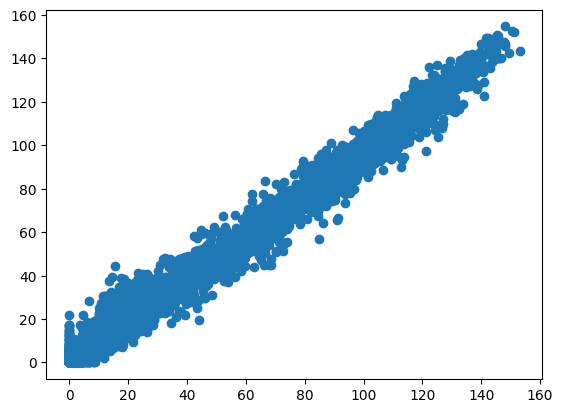

In [24]:
plt.scatter(y_train,preds)

In [25]:
predicted_values=xgb.predict(x_test)

predicted_values=[0 if pred<2 else pred for pred in predicted_values]

In [26]:
len(predicted_values)

720

In [27]:
res=pd.Series(predicted_values, name='Predictions')
res.to_excel('predictions.xlsx')